## Import Required Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [38]:
df=pd.read_csv("house_price_prediction_dataset.csv")
df.head()

,ID,Location,Area_sqft,Bedrooms,Bathrooms,Floors,Year_Built,Garage,Nearby_School_Rating,Distance_to_CityCenter_km,Has_Garden,Crime_Rate,House_Type,Price
0,1,Countryside,1736,2,3,3,1983,No,2.5,5.5,Yes,8.70,Apartment,342590.49
1,2,Downtown,2453,3,2,1,2009,Yes,3.4,24.7,Yes,2.14,Townhouse,118411.18
2,3,Countryside,2120,2,3,1,1990,Yes,2.1,7.5,Yes,1.21,Detached,77607.33
3,4,Countryside,3089,2,1,2,2009,No,3.5,7.5,Yes,2.77,Townhouse,401342.71
4,5,Downtown,1163,3,1,1,2010,No,2.6,16.6,No,0.67,Detached,256910.19


In [39]:
df.tail()

,ID,Location,Area_sqft,Bedrooms,Bathrooms,Floors,Year_Built,Garage,Nearby_School_Rating,Distance_to_CityCenter_km,Has_Garden,Crime_Rate,House_Type,Price
195,196,Suburb,3994,3,1,1,2020,Yes,5.0,21.6,No,0.79,Townhouse,385580.20
196,197,Countryside,727,4,2,2,2001,No,1.7,26.3,No,5.24,Apartment,141116.25
197,198,Countryside,2665,1,1,1,1990,Yes,2.6,21.7,No,0.77,Semi-detached,481133.07
198,199,Suburb,2416,4,2,2,2002,No,4.0,24.3,No,8.02,Detached,215573.34
199,200,Downtown,2358,4,1,2,1980,Yes,3.8,10.8,Yes,2.41,Detached,197119.23


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         200 non-null    int64  
 1   Location                   200 non-null    object 
 2   Area_sqft                  200 non-null    int64  
 3   Bedrooms                   200 non-null    int64  
 4   Bathrooms                  200 non-null    int64  
 5   Floors                     200 non-null    int64  
 6   Year_Built                 200 non-null    int64  
 7   Garage                     200 non-null    object 
 8   Nearby_School_Rating       200 non-null    float64
 9   Distance_to_CityCenter_km  200 non-null    float64
 10  Has_Garden                 200 non-null    object 
 11  Crime_Rate                 200 non-null    float64
 12  House_Type                 200 non-null    object 
 13  Price                      200 non-null    float64

In [41]:
df.shape

(200, 14)

In [42]:
df.columns

Index(['ID', 'Location', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Floors',
       'Year_Built', 'Garage', 'Nearby_School_Rating',
       'Distance_to_CityCenter_km', 'Has_Garden', 'Crime_Rate', 'House_Type',
       'Price'],
      dtype='object')

In [50]:
# Drop unnecessary columns
df = df.drop(columns=["ID"])

In [51]:
df.isnull().sum()

Location                     0
Area_sqft                    0
Bedrooms                     0
Bathrooms                    0
Floors                       0
Year_Built                   0
Garage                       0
Nearby_School_Rating         0
Distance_to_CityCenter_km    0
Has_Garden                   0
Crime_Rate                   0
House_Type                   0
Price                        0
House_Age                    0
dtype: int64

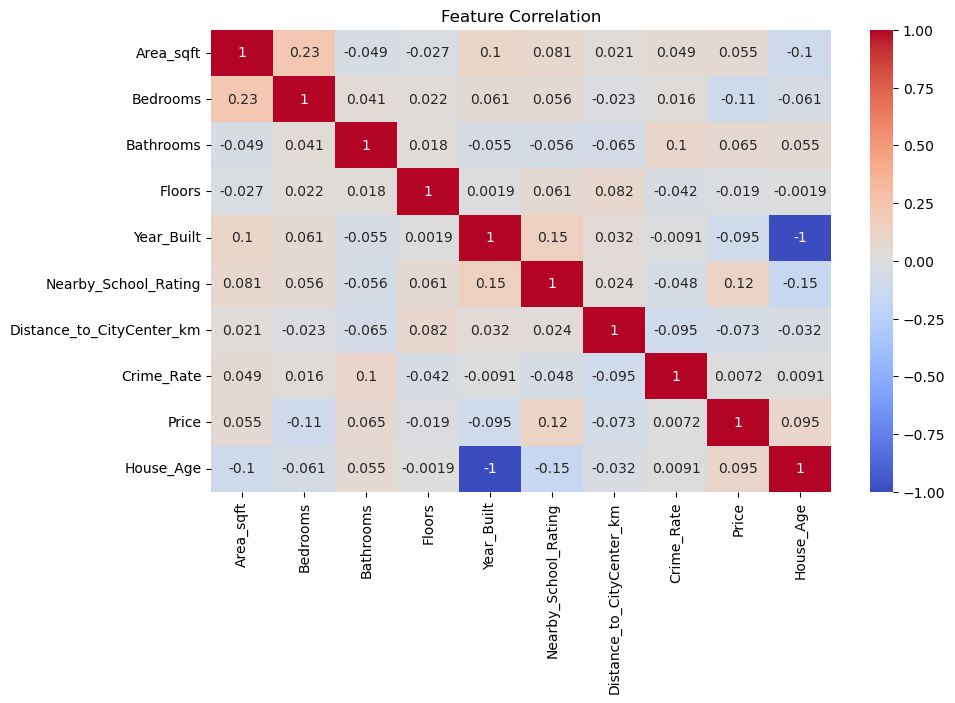

In [52]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

###  Feature Selection

In [53]:
# Feature Engineering: Add House Age
current_year = 2025
df["House_Age"] = current_year - df["Year_Built"]

In [54]:
# Separate features and target
X = df.drop(columns=[ "Price"])
y = df["Price"]

In [55]:
# Define feature types
categorical_features = ["Location", "Garage", "Has_Garden", "House_Type"]
numerical_features = [col for col in X.columns if col not in categorical_features]

In [59]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

### Train the Model

In [60]:
# Full pipeline with Linear Regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [62]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Area_sqft', 'Bedrooms',
                                                   'Bathrooms', 'Floors',
                                                   'Year_Built',
                                                   'Nearby_School_Rating',
                                                   'Distance_to_CityCenter_km',
                                                   'Crime_Rate', 'House_Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'Garage',
                                                   'Has_Garden',
                                                   'House_Type'])])),
                ('regressor', LinearRegression())])

### Prediction

In [65]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅Linear Regression RMSE: ₹{rmse:,.2f}")

✅Linear Regression RMSE: ₹133,309.90


In [66]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -0.13986956873661116


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
Linear Regression MSE: 24.29111947497351
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)

### 📊 VISUALIZATIONS

# 1. Actual vs Predicted Prices

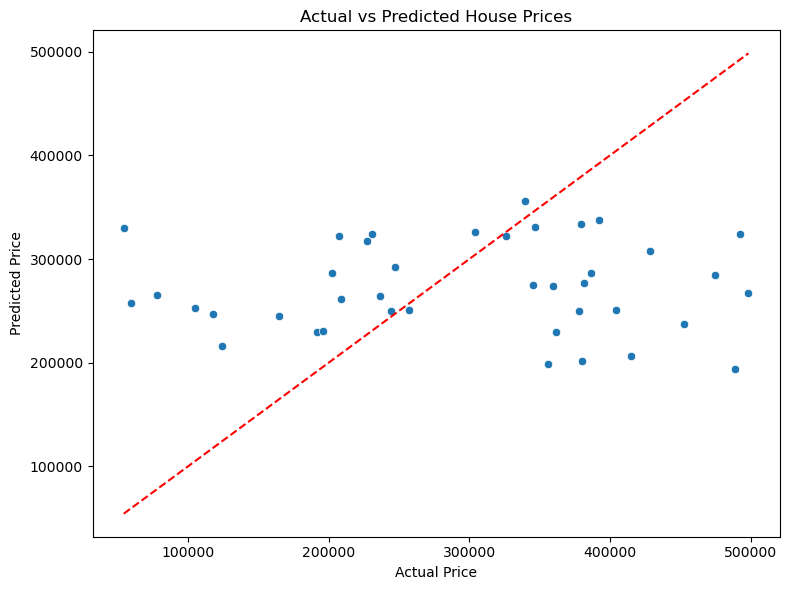

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()


# 2. Residuals Plot

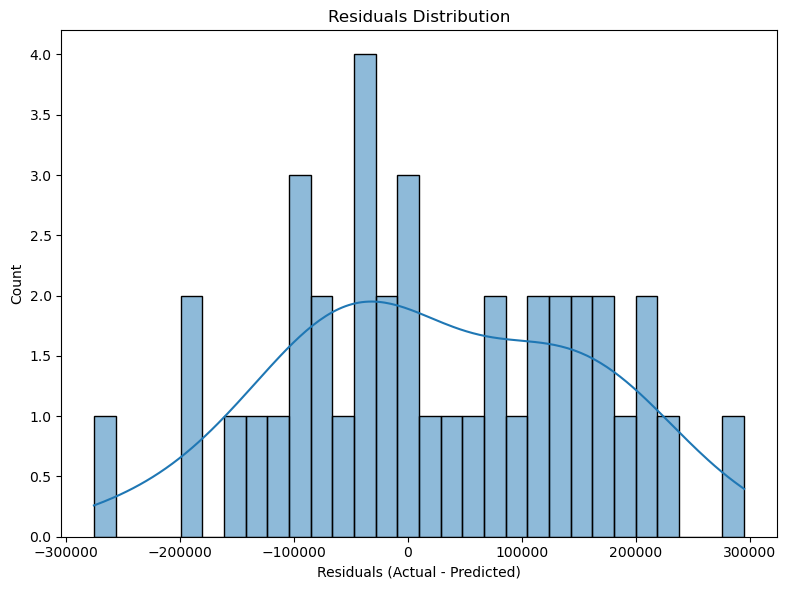

In [33]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()